In [17]:
from fastai.vision.all import *
import pandas as pd
import os 

In [18]:
classes = ['NoVehicle', 'Vehicle']
path = '/content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/'
sub_paths = [path + 'NoVehicle/', path + 'Vehicle/']
model_name = 'PwV_Classifier'

In [19]:
pred_files = []
for sub_path in sub_paths:
    pred_files.extend([sub_path + pred_file for pred_file in os.listdir(sub_path)])

In [20]:
learn_inf = load_learner(f'{path}/models/{model_name}.pkl')
learn_inf.dls.cuda()

In [21]:
learn_inf.dls.tfms

(#2) [Pipeline: PILBase.create,Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}]

In [22]:
bs = 20

In [23]:
dl = learn_inf.dls.test_dl(pred_files,device='cuda', bs = bs)

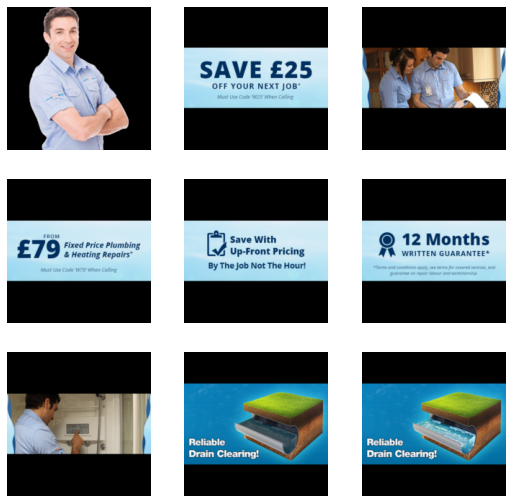

In [24]:
dl.show_batch()

In [25]:
pred_class_int = learn_inf.get_preds(dl=dl,with_decoded=True)[2]

In [26]:
for pred, file_path in zip(pred_class_int,pred_files):
    if pred == 1 and 'NoVehicle' in file_path:
        print('False Pos', file_path)
    elif pred == 0 and 'NoVehicle' not in file_path:
        print('False Neg', file_path)


False Pos /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/NoVehicle/00217_00005.png
False Pos /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/NoVehicle/00061_00007.png
False Pos /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/NoVehicle/00107_00019.png
False Pos /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/NoVehicle/00321_00002.png
False Neg /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/Vehicle/00117_00004.png
False Neg /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/Vehicle/00285_00008.png
False Neg /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/Vehicle/00350_00002.png
False Neg /content/drive/MyDrive/Projects/Plumbers_with_Vehicles/Images/Vehicle/00373_00087.png
